In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
df=pd.DataFrame()

In [3]:
df=df.append(pd.read_csv("C:/Users/yn/Desktop/Yuvi/DataTrained/InternshipProjects/CarPricePrediction/CarPriceDataSetCarDheko.csv"))

In [4]:
df=df.append(pd.read_csv("C:/Users/yn/Desktop/Yuvi/DataTrained/InternshipProjects/CarPricePrediction/CarPriceDataSetCars24.csv"))

In [5]:
df=df.append(pd.read_csv("C:/Users/yn/Desktop/Yuvi/DataTrained/InternshipProjects/CarPricePrediction/CarPriceDataSetCarWala.csv"))

In [6]:
df=df.append(pd.read_csv("C:/Users/yn/Desktop/Yuvi/DataTrained/InternshipProjects/CarPricePrediction/CarPriceDataSetOlx.csv"))

In [7]:
df.shape

(89265, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89265 entries, 0 to 18030
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         89265 non-null  int64 
 1   Brand              89265 non-null  object
 2   Model              89265 non-null  object
 3   Variant            89265 non-null  object
 4   Body Type          89265 non-null  object
 5   Location           89265 non-null  object
 6   Km Driven          89265 non-null  object
 7   Transmission Type  89265 non-null  object
 8   Fuel Type          89265 non-null  object
 9   Manufacture Year   89265 non-null  object
 10  No.Of.Owners       89265 non-null  object
 11  Price              89265 non-null  object
dtypes: int64(1), object(11)
memory usage: 8.9+ MB


In [9]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

## Exploratory Data Analysis

In [10]:
df.isna().sum()

Brand                0
Model                0
Variant              0
Body Type            0
Location             0
Km Driven            0
Transmission Type    0
Fuel Type            0
Manufacture Year     0
No.Of.Owners         0
Price                0
dtype: int64

In [11]:
df.tail(50)

,Brand,Model,Variant,Body Type,Location,Km Driven,Transmission Type,Fuel Type,Manufacture Year,No.Of.Owners,Price
17981,Maruti Suzuki,Alto,2005-2010 LX BSIII,HATCHBACK,Bazpur,50000,Manual,Petrol,2008,1st,97000.0
17982,Maruti Suzuki,Swift,2004-2010 VDI BSIV,HATCHBACK,Dehradun,75000,Manual,Diesel,2010,2nd,175000.0
17983,Hyundai,Verna,2006-2009 1.6 i ABS,SEDAN,Dehradun,75000,Manual,Diesel,2008,2nd,149000.0
17984,Mahindra,Scorpio,2002-2013 VLX,SUV,Dehradun,75000,Manual,Diesel,2010,1st,359000.0
17985,Maruti Suzuki,Omni,8 Seater BSIV,MINIVAN,Dehradun,26000,Manual,Petrol,2016,1st,199000.0
17986,Maruti Suzuki,Alto,2005-2010 LXi BSIII,HATCHBACK,Kashipur,35000,Manual,CNG & Hybrids,2008,2nd,140000.0
17987,Chevrolet,Beat,Others,HATCHBACK,Chamba,35000,Automatic,Petrol,2011,2nd,170000.0
17988,Maruti Suzuki,Alto,2005-2010 STD,HATCHBACK,Kashipur,200000,Manual,Petrol,2007,2nd,85000.0
17989,Maruti Suzuki,Swift,VDI,HATCHBACK,Rudrapur,113000,Manual,Diesel,2015,1st,450000.0
17990,Force Motors,Others,Others,OTHERS,Almora,25000,Manual,Diesel,2017,1st,800000.0


In [12]:
for col in df.columns:
    print(col)
    print("=======================")
    print(df[col].value_counts(),'\n')

Brand
Maruti Suzuki    18467
Hyundai          15762
Honda             8008
Maruti            5479
Mahindra          4772
                 ...  
San                  1
2014                 1
Maybach              1
Ashok                1
Dc                   1
Name: Brand, Length: 88, dtype: int64 

Model
Hyundai i20                  1117
Swift [2011-2014]            1053
Vitara Brezza [2016-2020]    1051
Grand i10 [2013-2017]        1046
Hyundai Grand i10            1007
                             ... 
6 Series                        1
M4 [2014-2018]                  1
Captiva [2012-2016]             1
Alphard [2008-2013]             1
Gallardo [2005 - 2014]          1
Name: Model, Length: 1217, dtype: int64 

Variant
VXI                      2763
LXI                      1322
VXi                      1120
Others                   1083
VDi                      1060
                         ... 
800 Std CNG                 1
AMT Quadrajet 1.3 XMA       1
RX L DIESEL                 1
2

We have missing values in body type and transmission type

In [13]:
df[df['Body Type']=='-']

,Brand,Model,Variant,Body Type,Location,Km Driven,Transmission Type,Fuel Type,Manufacture Year,No.Of.Owners,Price
11,MARUTI,OMNI E,8 STR,-,Bengaluru,25265,Manual,Petrol,2018,1,355499
31,MARUTI,OMNI E,8 STR,-,Bengaluru,25265,Manual,Petrol,2018,1,355499
238,FORD,FREESTYLE,TITANIUM + 1.2 TI-VCT,-,Bengaluru,35175,Manual,Petrol,2018,1,614099
254,FORD,FREESTYLE,TITANIUM 1.2 TI-VCT MT,-,Bengaluru,31061,-,Petrol,2018,1,677799
262,FORD,FREESTYLE,TITANIUM 1.2 TI-VCT MT,-,Bengaluru,31399,Manual,Petrol,2018,1,654399
...,...,...,...,...,...,...,...,...,...,...,...
50325,Kia,Sonet,GTX Plus 1.5 AT [2020-2021],-,Aurangabad,9300,Automatic,Diesel,2020,First Owner,1500000
50361,Kia,Sonet,GTX Plus 1.5 AT [2020-2021],-,Aurangabad,9300,Automatic,Diesel,2020,First Owner,1500000
50373,Hyundai,Venue,SX Plus 1.0 Turbo DCT,-,Mumbai,22000,Automatic,Petrol,2019,First Owner,1095000
50374,Ford,EcoSport,Titanium + 1.5L Ti-VCT AT [2019-2020],-,Kolkata,48476,Automatic,Petrol,2018,Second Owner,699999


In [14]:
df[df['Transmission Type']=='-']

,Brand,Model,Variant,Body Type,Location,Km Driven,Transmission Type,Fuel Type,Manufacture Year,No.Of.Owners,Price
200,RENAULT,KWID,RXT 1.0 EASY-R AT,Hatchback,Chennai,17480,-,Petrol,2016,1,385899
254,FORD,FREESTYLE,TITANIUM 1.2 TI-VCT MT,-,Bengaluru,31061,-,Petrol,2018,1,677799
260,HYUNDAI,CRETA,1.6 SX CRDI,SUV,Bengaluru,113574,-,Diesel,2016,1,901699
322,FORD,FREESTYLE,TITANIUM 1.2 TI-VCT MT,-,Bengaluru,15307,-,Petrol,2018,1,711699
470,HYUNDAI,AURA,SX+ AT,Sedan,Jaipur,7197,-,Petrol,2020,1,745199
...,...,...,...,...,...,...,...,...,...,...,...
5673,HONDA,CITY ZX,1.5 EXI,-,Aurangabad,91190,-,Petrol,2006,3,100000
5677,HYUNDAI,CRETA,1.6 SX (O) CRDI,-,Gurgaon,59167,-,Diesel,2015,1,930000
5680,HONDA,CITY ZX,1.5 EXI,-,New Delhi,94111,-,Petrol,2007,4,99000
5681,JAGUAR,XE,PRESTIGE DIESEL,-,Vadodara,9892,-,Diesel,2017,1,3500000


I will drop the rows with missing values as it will not be appropriate data if we try filling the missing values using mode.

In [15]:
df.loc[df['Body Type']=='-','Body Type']=np.nan

In [16]:
df.isna().sum()

Brand                   0
Model                   0
Variant                 0
Body Type            3163
Location                0
Km Driven               0
Transmission Type       0
Fuel Type               0
Manufacture Year        0
No.Of.Owners            0
Price                   0
dtype: int64

In [17]:
df.loc[df['Transmission Type']=='-','Transmission Type']=np.nan

In [18]:
df.isna().sum()

Brand                   0
Model                   0
Variant                 0
Body Type            3163
Location                0
Km Driven               0
Transmission Type     133
Fuel Type               0
Manufacture Year        0
No.Of.Owners            0
Price                   0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.isna().sum()

Brand                0
Model                0
Variant              0
Body Type            0
Location             0
Km Driven            0
Transmission Type    0
Fuel Type            0
Manufacture Year     0
No.Of.Owners         0
Price                0
dtype: int64

In [21]:
df.shape

(86063, 11)

In [22]:
df['Brand'].unique()

array(['Maruti', 'Toyota', 'Honda', 'Hyundai', 'MG', 'Datsun', 'Renault',
       'Mahindra', 'Volkswagen', 'Skoda', 'Tata', 'Jeep', 'Kia', 'Nissan',
       'Volvo', 'Ford', 'Audi', 'Mercedes-Benz', 'BMW', 'Fiat',
       'Land Rover', 'Porsche', 'Chevrolet', 'HYUNDAI', 'MARUTI', 'TATA',
       'FORD', 'RENAULT', 'NISSAN', 'TOYOTA', 'SSANGYONG', 'DATSUN',
       'VOLKSWAGEN', 'MAHINDRA', 'HONDA', 'KIA', 'MERCEDES BENZ', 'AUDI',
       'SKODA', 'FIAT', 'JAGUAR', 'CHEVROLET', 'MAHINDRA RENAULT',
       'LANDROVER', 'OPEL', 'VOLVO', 'Maruti Suzuki', 'Mitsubishi',
       'Ssangyong', 'Hindustan Motors', 'Isuzu', 'Mahindra-Renault', 'DC',
       'Premier', 'Opel', 'MINI', 'Jaguar', 'Lexus', 'Rolls-Royce',
       'Aston Martin', 'Bentley', 'Hummer', 'Lamborghini', 'Maserati',
       'Chrysler', 'Ferrari', 'Mercedes Benz', 'Bajaj', '2015',
       'Other Brands', 'Force Motors', '2012', 'Mahindra Renault', 'Mini',
       'Ambassador', 'Daewoo', 'San', 'Maybach', 'Eicher Polaris', '2011',
       

In [23]:
df['Brand']=[x.lower() for x in df['Brand']]

In [24]:
df['Brand'].unique()

array(['maruti', 'toyota', 'honda', 'hyundai', 'mg', 'datsun', 'renault',
       'mahindra', 'volkswagen', 'skoda', 'tata', 'jeep', 'kia', 'nissan',
       'volvo', 'ford', 'audi', 'mercedes-benz', 'bmw', 'fiat',
       'land rover', 'porsche', 'chevrolet', 'ssangyong', 'mercedes benz',
       'jaguar', 'mahindra renault', 'landrover', 'opel', 'maruti suzuki',
       'mitsubishi', 'hindustan motors', 'isuzu', 'mahindra-renault',
       'dc', 'premier', 'mini', 'lexus', 'rolls-royce', 'aston martin',
       'bentley', 'hummer', 'lamborghini', 'maserati', 'chrysler',
       'ferrari', 'bajaj', '2015', 'other brands', 'force motors', '2012',
       'ambassador', 'daewoo', 'san', 'maybach', 'eicher polaris', '2011',
       '2014', 'ashok leyland', 'hindustan', 'peugeot', 'ashok', 'aston',
       'caterham'], dtype=object)

In [25]:
df['Brand']=df['Brand'].replace({'maruti suzuki':'maruti','mahindra-renault':'mahindra renault','mercedes-benz':'mercedes benz',
                                'hindustan motors':'hindustan','aston':'aston martin','ashok':'ashok leyland'})

In [26]:
df['Brand'].unique()

array(['maruti', 'toyota', 'honda', 'hyundai', 'mg', 'datsun', 'renault',
       'mahindra', 'volkswagen', 'skoda', 'tata', 'jeep', 'kia', 'nissan',
       'volvo', 'ford', 'audi', 'mercedes benz', 'bmw', 'fiat',
       'land rover', 'porsche', 'chevrolet', 'ssangyong', 'jaguar',
       'mahindra renault', 'landrover', 'opel', 'mitsubishi', 'hindustan',
       'isuzu', 'dc', 'premier', 'mini', 'lexus', 'rolls-royce',
       'aston martin', 'bentley', 'hummer', 'lamborghini', 'maserati',
       'chrysler', 'ferrari', 'bajaj', '2015', 'other brands',
       'force motors', '2012', 'ambassador', 'daewoo', 'san', 'maybach',
       'eicher polaris', '2011', '2014', 'ashok leyland', 'peugeot',
       'caterham'], dtype=object)

In [27]:
df[df['Brand']=='2015'].Brand.value_counts()

2015    1
Name: Brand, dtype: int64

In [28]:
df.loc[df['Brand']=='2015','Brand']=np.nan

In [29]:
df[df['Brand']=='2012'].Brand.value_counts()

2012    2
Name: Brand, dtype: int64

In [30]:
df.loc[df['Brand']=='2012','Brand']=np.nan

In [31]:
df[df['Brand']=='2011'].Brand.value_counts()

2011    2
Name: Brand, dtype: int64

In [32]:
df.loc[df['Brand']=='2011','Brand']=np.nan

In [33]:
df[df['Brand']=='2014'].Brand.value_counts()

2014    1
Name: Brand, dtype: int64

In [34]:
df.loc[df['Brand']=='2014','Brand']=np.nan

In [35]:
df.isna().sum()

Brand                6
Model                0
Variant              0
Body Type            0
Location             0
Km Driven            0
Transmission Type    0
Fuel Type            0
Manufacture Year     0
No.Of.Owners         0
Price                0
dtype: int64

In [36]:
df.dropna(inplace=True)

In [37]:
df['Model'].unique()[:500]

array(['Maruti Baleno', 'Maruti S-Presso', 'Toyota Urban cruiser',
       'Honda City', 'Hyundai Grand i10', 'Maruti SX4 S Cross',
       'Maruti Wagon R', 'Maruti XL6', 'MG Hector', 'Datsun RediGO',
       'Maruti Alto K10', 'Renault Duster', 'Mahindra Thar',
       'Volkswagen Polo', 'Maruti Celerio', 'Volkswagen Ameo',
       'Maruti Swift', 'Mahindra XUV500', 'Hyundai i20', 'Renault Triber',
       'Renault KWID', 'Volkswagen Jetta', 'Maruti Swift Dzire',
       'Skoda Rapid', 'Renault Kiger', 'Tata Tiago', 'Honda Amaze',
       'Jeep Compass', 'Hyundai Santro', 'Hyundai Creta', 'Tata Harrier',
       'Mahindra XUV300', 'Maruti Alto 800', 'Honda BR-V', 'Maruti Ignis',
       'Kia Sonet', 'Mahindra Bolero', 'Hyundai i10',
       'Hyundai Grand i10 Nios', 'Toyota Yaris', 'Maruti Ciaz',
       'Honda Jazz', 'Hyundai EON', 'Maruti Ritz', 'Honda WR-V',
       'Mahindra KUV 100', 'Mahindra Marazzo', 'Maruti Vitara Brezza',
       'Volkswagen Vento', 'Hyundai Venue', 'Honda Brio',
       

In [38]:
df['Model']=[x[:x.rindex("[")].strip()  if '[' in x else x for x in df['Model']]

In [39]:
len(df['Model'].unique())

772

In [40]:
df['Model']=[x.lower() for x in df['Model']]

In [41]:
len(df['Model'].unique())

632

In [42]:
df['Model'].unique()[:]

array(['maruti baleno', 'maruti s-presso', 'toyota urban cruiser',
       'honda city', 'hyundai grand i10', 'maruti sx4 s cross',
       'maruti wagon r', 'maruti xl6', 'mg hector', 'datsun redigo',
       'maruti alto k10', 'renault duster', 'mahindra thar',
       'volkswagen polo', 'maruti celerio', 'volkswagen ameo',
       'maruti swift', 'mahindra xuv500', 'hyundai i20', 'renault triber',
       'renault kwid', 'volkswagen jetta', 'maruti swift dzire',
       'skoda rapid', 'renault kiger', 'tata tiago', 'honda amaze',
       'jeep compass', 'hyundai santro', 'hyundai creta', 'tata harrier',
       'mahindra xuv300', 'maruti alto 800', 'honda br-v', 'maruti ignis',
       'kia sonet', 'mahindra bolero', 'hyundai i10',
       'hyundai grand i10 nios', 'toyota yaris', 'maruti ciaz',
       'honda jazz', 'hyundai eon', 'maruti ritz', 'honda wr-v',
       'mahindra kuv 100', 'mahindra marazzo', 'maruti vitara brezza',
       'volkswagen vento', 'hyundai venue', 'honda brio',
       

In [43]:
type(df['Model'])

pandas.core.series.Series

In [44]:
df['Model']=[x.replace('maruti ','').replace('toyota ','').replace('honda ','').replace('hyundai ','').replace('datsun ','').replace('renault ','').replace('mahindra ','') 
             .replace('volkswagen ','').replace('skoda ','').replace('tata ','').replace('jeep ','').replace('kia ','').replace('nissan ','').replace('mg ','').replace('volvo ','').replace('ford ','').replace('audi ','')
             .replace('mercedes-benz ','').replace('bmw ','').replace('porsche ','').replace('chevrolet ','') for x in df['Model']]

In [45]:
len(df['Model'].unique())

529

In [46]:
df['Model'].unique()

array(['baleno', 's-presso', 'urban cruiser', 'city', 'grand i10',
       'sx4 s cross', 'wagon r', 'xl6', 'hector', 'redigo', 'alto k10',
       'duster', 'thar', 'polo', 'celerio', 'ameo', 'swift', 'xuv500',
       'i20', 'triber', 'kwid', 'jetta', 'swift dzire', 'rapid', 'kiger',
       'tiago', 'amaze', 'compass', 'santro', 'creta', 'harrier',
       'xuv300', 'alto 800', 'br-v', 'ignis', 'sonet', 'bolero', 'i10',
       'grand i10 nios', 'yaris', 'ciaz', 'jazz', 'eon', 'ritz', 'wr-v',
       'kuv 100', 'marazzo', 'vitara brezza', 'vento', 'venue', 'brio',
       'terrano', 'kicks', 'xcent', 'innova crysta', 'nexon', 'verna',
       'hector plus', 'etios', 'corolla altis', 'glanza', 'ertiga',
       'tuv 300', 'i20 active', 'celerio x', 'aura', 'altroz',
       'micra active', 's60 cross country', 'figo', 'eeco', 'a6', 'a4',
       'go', 'tigor', 'cr-v', 'alto', 'e-class', 'innova', 'baleno rs',
       'fortuner', '3 series', 'g', 'q3', 'santro xing', 'q5',
       'fiat grande punt

In [47]:
df['Model']=[re.sub('[^A-Za-z0-9]+', '', x) for x in df['Model']]

In [48]:
len(df['Model'].unique())

507

In [49]:
df['Model'].unique()

array(['baleno', 'spresso', 'urbancruiser', 'city', 'grandi10',
       'sx4scross', 'wagonr', 'xl6', 'hector', 'redigo', 'altok10',
       'duster', 'thar', 'polo', 'celerio', 'ameo', 'swift', 'xuv500',
       'i20', 'triber', 'kwid', 'jetta', 'swiftdzire', 'rapid', 'kiger',
       'tiago', 'amaze', 'compass', 'santro', 'creta', 'harrier',
       'xuv300', 'alto800', 'brv', 'ignis', 'sonet', 'bolero', 'i10',
       'grandi10nios', 'yaris', 'ciaz', 'jazz', 'eon', 'ritz', 'wrv',
       'kuv100', 'marazzo', 'vitarabrezza', 'vento', 'venue', 'brio',
       'terrano', 'kicks', 'xcent', 'innovacrysta', 'nexon', 'verna',
       'hectorplus', 'etios', 'corollaaltis', 'glanza', 'ertiga',
       'tuv300', 'i20active', 'celeriox', 'aura', 'altroz', 'micraactive',
       's60crosscountry', 'figo', 'eeco', 'a6', 'a4', 'go', 'tigor',
       'crv', 'alto', 'eclass', 'innova', 'balenors', 'fortuner',
       '3series', 'g', 'q3', 'santroxing', 'q5', 'fiatgrandepunto',
       'landroverrangeroversport',

In [50]:
df['Brand']=[re.sub('[^A-Za-z0-9]+', '', x) for x in df['Brand']]

In [51]:
len(df['Brand'].unique())

53

In [52]:
df['Brand'].unique()

array(['maruti', 'toyota', 'honda', 'hyundai', 'mg', 'datsun', 'renault',
       'mahindra', 'volkswagen', 'skoda', 'tata', 'jeep', 'kia', 'nissan',
       'volvo', 'ford', 'audi', 'mercedesbenz', 'bmw', 'fiat',
       'landrover', 'porsche', 'chevrolet', 'ssangyong', 'jaguar',
       'mahindrarenault', 'opel', 'mitsubishi', 'hindustan', 'isuzu',
       'dc', 'premier', 'mini', 'lexus', 'rollsroyce', 'astonmartin',
       'bentley', 'hummer', 'lamborghini', 'maserati', 'chrysler',
       'ferrari', 'bajaj', 'otherbrands', 'forcemotors', 'ambassador',
       'daewoo', 'san', 'maybach', 'eicherpolaris', 'ashokleyland',
       'peugeot', 'caterham'], dtype=object)

In [53]:
df['Variant'].unique()[:100]

array(['1.2 CVT Zeta', 'VXI Plus', 'High', 'i VTEC CVT VX',
       '1.2 Kappa Asta', 'DDiS 200 Zeta', 'CNG LXI', '1.2 Kappa Era',
       'Zeta', 'Sharp DCT', 'AMT 1.0 T Option', 'VXI', 'RXZ',
       'LX 4-Str Hard Top AT', '1.2 MPI Comfortline', 'Zeta CVT',
       'VXI Optional', '1.5 TDI Highline', 'W8 2WD', 'VXI BSIV',
       '1.2 Asta Option', 'RXT', 'VXI Plus AT', 'AMT VXI',
       'Asta Opt Diesel', 'i VTEC VX', 'R W10 FWD', 'V MT', '1.0 RXT Opt',
       'i-VTEC CVT ZX', 'ZXI Optional', 'RXT Optional',
       '1.4 TSI Comfortline', 'VXI 1.2 BS IV', '1.5 TDI AT Style BSIV',
       'RXT AMT DT', '1.2 Delta', 'LXI', '1.2 Revotron XZ Plus',
       'E Diesel BSIV', '1.2 Zeta', '1.4 Longitude Option BSIV', 'Sportz',
       'Asta Opt', '110PS Diesel RxZ', 'SX', 'XT plus',
       'W8 AMT Optional Diesel', 'i-VTEC V CVT', '1.2 AMT Zeta BSIV',
       'Alpha', 'VDI Optional', 'i VTEC V', 'STD', 'Sportz Option 1.2',
       'VXI BS IV', 'Sharp CVT', '1.0 MPI Trendline', 'HTX Turbo iMT',
      

In [54]:
df['Variant']=[x.lower() for x in df['Variant']]

In [55]:
len(df['Variant'].unique())

5597

In [56]:
df['Variant']=[re.sub('[^A-Za-z0-9]+', '', x) for x in df['Variant']]

In [57]:
len(df['Variant'].unique())

5365

In [58]:
df['Variant'].unique()[:100]

array(['12cvtzeta', 'vxiplus', 'high', 'ivteccvtvx', '12kappaasta',
       'ddis200zeta', 'cnglxi', '12kappaera', 'zeta', 'sharpdct',
       'amt10toption', 'vxi', 'rxz', 'lx4strhardtopat',
       '12mpicomfortline', 'zetacvt', 'vxioptional', '15tdihighline',
       'w82wd', 'vxibsiv', '12astaoption', 'rxt', 'vxiplusat', 'amtvxi',
       'astaoptdiesel', 'ivtecvx', 'rw10fwd', 'vmt', '10rxtopt',
       'ivteccvtzx', 'zxioptional', 'rxtoptional', '14tsicomfortline',
       'vxi12bsiv', '15tdiatstylebsiv', 'rxtamtdt', '12delta', 'lxi',
       '12revotronxzplus', 'edieselbsiv', '12zeta',
       '14longitudeoptionbsiv', 'sportz', 'astaopt', '110psdieselrxz',
       'sx', 'xtplus', 'w8amtoptionaldiesel', 'ivtecvcvt',
       '12amtzetabsiv', 'alpha', 'vdioptional', 'ivtecv', 'std',
       'sportzoption12', 'sharpcvt', '10mpitrendline', 'htxturboimt',
       'alphaat', 'b6opt', 'sportz11l', '10rxt02anniversaryedition',
       'rxteasyramt', 'magna', 'xzplus', '14limitedoption',
       'xzaplus

In [59]:
df['Body Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Minivans', 'Luxury Vehicles',
       'Luxury SUV', 'Luxury Sedan', 'Suv', 'Minivan', 'Truck', 'Coupe',
       'Convertible', 'StationWagon', 'HATCHBACK', 'HYBRID_SEDAN',
       'LUXURY_SEDAN', 'SEDAN', 'OTHERS', 'LUXURY_SUV', 'MINIVAN',
       'LUXURY', 'LUXURY_HATCHBACK'], dtype=object)

In [60]:
df['Body Type']=df['Body Type'].replace('Minivans','Minivan')

In [61]:
len(df['Body Type'].unique())

22

In [62]:
df['Body Type']=[x.lower() for x in df['Body Type']]

In [63]:
len(df['Body Type'].unique())

18

In [64]:
df['Body Type']=[re.sub('[^A-Za-z0-9]+', '', x) for x in df['Body Type']]

In [65]:
len(df['Body Type'].unique())

16

In [66]:
df['Location'].unique()

array(['Pune', 'Bangalore', 'Hyderabad', ..., 'Chamba', 'Pauri',
       'Devaprayag'], dtype=object)

In [67]:
len(df['Location'].unique())

1875

In [68]:
df['Location']=[x.lower() for x in df['Location']]

In [69]:
len(df['Location'].unique())

1872

In [70]:
df['Location'].unique()[:100]

array(['pune', 'bangalore', 'hyderabad', 'new delhi', 'jaipur', 'mumbai',
       'noida', 'gurgaon', 'ghaziabad', 'ahmedabad', 'chandigarh',
       'bhubaneswar', 'jalore', 'arrah', 'washim', 'kolkata', 'ranchi',
       'rewari', 'karimnagar', 'palanpur', 'nashik', 'rajahmundry',
       'varanasi', 'patna', 'leh', 'indore', 'allahabad', 'port blair',
       'chennai', 'kaithal', 'moodabidri', 'gaya', 'vadodara', 'barnala',
       'dhanbad', 'jalandhar', 'gondia', 'shimoga', 'amravati',
       'dharuhera', 'bhopal', 'charkhi dadri', 'phagwara', 'katni',
       'belgaum', 'kanpur', 'kochi', 'panipat', 'bengaluru', 'lucknow',
       'nagpur', 'faridabad', 'nasik', 'surat', 'rohtak', 'rajkot',
       'ludhiana', 'zirakpur', 'panchkula', 'amritsar', 'gandhinagar',
       'mohali', 'aurangabad', 'guwahati', 'goa', 'hisar', 'tiruppur',
       'coimbatore', 'muvattupuzha', 'udaipur', 'jabalpur', 'alwar',
       'mysore', 'guntur', 'jodhpur', 'kota', 'dehradun', 'sonipat',
       'hubli', 'vija

In [71]:
df['Location'].unique()[1000:]

array(['hansi', 'ladwa', 'yamunanagar', 'bhiwani', 'pinjore', 'narnaund',
       'kalayat', 'tohana', 'kalanwali', 'gharaunda', 'bhakali',
       'bawani khera', 'ismailabad', 'mandi dabwali', 'sadaura', 'palwal',
       'barara', 'industrial estate barwala', 'maham', 'mahendragarh',
       'rania', 'cheeka', 'ganaur', 'ratia', 'haileymandi',
       'garhi harsaru', 'sampla', 'raipur rani', 'kundli',
       'roz ka meo industrial area', 'uklanamandi', 'loharu', 'kanina',
       'narwana', 'nilokheri', 'pataudi', 'bawal', 'ateli', 'kalanaur',
       'beri', 'narnaul', 'samalkha', 'naraingarh', 'gangwa', 'majra',
       'safidon', 'ellenabad', 'julana', 'ongole', 'gurzala', 'pamidi',
       'eluru', 'jangareddigudem', 'kadapa', 'anantapur',
       ' east godavari district', 'nandigama', 'pulivendula',
       'mamidalapadu', 'jaggaiahpet', 'vijayanagaram district',
       'sattenapalle', 'vinukonda', 'narasapur', 'tuni',
       'india cement factory chilamakuru', 'amalapuram', 'bhimavaram

In [72]:
df['Location']=[re.sub('[^A-Za-z0-9]+', '', x) for x in df['Location']]

In [73]:
len(df['Location'].unique())

1870

In [74]:
len(df['Km Driven'].unique())

14273

In [75]:
df['Km Driven'].unique()[:100]

array(['23,825', '1,670', '5,178', '58,761', '42,754', '70,068', '34,486',
       '67,498', '11,410', '9,014', '3,294', '24,692', '9,703', '5,959',
       '19,373', '48,359', '19,595', '75,671', '5,442', '50,000',
       '14,385', '6,307', '54,611', '306', '10,004', '49,990', '17,058',
       '13,926', '20,203', '1,24,852', '8,649', '1,306', '18,941',
       '33,539', '7,099', '76,608', '56,471', '26,041', '28,419', '2,407',
       '73,151', '11,228', '19,314', '62,677', '40,348', '12,879',
       '5,045', '17,564', '5,604', '83,078', '47,886', '9,571', '8,730',
       '43,433', '31,918', '13,837', '26,075', '73,055', '46,401',
       '61,310', '38,897', '54,686', '18,251', '9,519', '13,990', '4,543',
       '79,168', '3,874', '35,534', '22,215', '28,660', '13,019',
       '14,161', '7,819', '4,456', '4,630', '23,432', '68,348', '13,479',
       '47,588', '48,480', '31,021', '21,478', '65,896', '42,925',
       '42,575', '20,471', '27,288', '58,614', '21,632', '58,557',
       '64,047'

In [76]:
df['Km Driven']=[str(x).replace(',','') for x in df['Km Driven']]

In [77]:
df['Km Driven'].unique()[10000:10100]

array(['49002', '8498', '107236', '132100', '78809', '56333', '32655',
       '46853', '27095', '30785', '7927', '88925', '52038', '114500',
       '72673', '70700', '83615', '57331', '102193', '65942', '40954',
       '91500', '19900', '42850', '49822', '90370', '100700', '29728',
       '45100', '126521', '194260', '80805', '56200', '21973', '69700',
       '37382', '38226', '41094', '49823', '109093', '81510', '34521',
       '87005', '89200', '191267', '70521', '44696', '33971', '7900',
       '10950', '97593', '24919', '45944', '16543', '86200', '54398',
       '56232', '103846', '260000', '30643', '11090', '124500', '77002',
       '31643', '41321', '57643', '128005', '18765', '87654', '77654',
       '128765', '137338', '37834', '84789', '70606', '113950', '76195',
       '21603', '126305', '85349', '37082', '78451', '164734', '27800',
       '22900', '35010', '50667', '61010', '74600', '68721', '32101',
       '37456', '44600', '35080', '24147', '31620', '41538', '20981',
     

In [78]:
print(df['Km Driven'].dtype)

object


In [79]:
df['Km Driven']=[round(float(x)) for x in df['Km Driven']]

In [80]:
len(df['Km Driven'].unique())

13038

In [81]:
df['Km Driven']=df['Km Driven'].astype(int)

In [82]:
print(df['Km Driven'].dtype)

int32


In [83]:
len(df['Transmission Type'].unique())

2

In [84]:
df['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric(Battery)',
       'Petrol + CNG', 'Petrol + LPG', 'Electric', 'Hybrid',
       'CNG & Hybrids'], dtype=object)

In [85]:
df['Fuel Type']=df['Fuel Type'].replace('Electric(Battery)','Electric')

In [86]:
df['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric', 'Petrol + CNG',
       'Petrol + LPG', 'Hybrid', 'CNG & Hybrids'], dtype=object)

In [87]:
df['Manufacture Year'].unique()

array([2016, 2019, 2021, 2017, 2020, 2013, 2018, 2015, 2014, 2011, 2012,
       2010, 2009, 2004, 2008, 2007, 2005, 2006, 2022, 1997, 1996, 1999,
       2002, 2000, 2001, 1998, 2003, 1992, 1991, 1995, 1988, 1993, 1994,
       '2011', '2009', '2007', '2014', '2017', '2012', '2013', '2015',
       '2016', '2019', '2010', '2018', '2021', '2005', '2022', '2004',
       '2020', '2003', '2008', '1998', '2001', '2006', '2002', '1985',
       '1996', '2000', '1999', '2015.0', '1990', '1997', '2014.0', '1987',
       '1995', '1993', '1900', '1989', '2013.0', '1991', '1972', '1992',
       '1986', '1994', '2012.0', '1988', '1976', '1973', '2011.0',
       '2019.0', '2016.0', '1974', '1923', '1945', '1979'], dtype=object)

In [88]:
df['Manufacture Year']=[round(float(x)) for x in df['Manufacture Year']]

In [89]:
df['Manufacture Year'].unique()

array([2016, 2019, 2021, 2017, 2020, 2013, 2018, 2015, 2014, 2011, 2012,
       2010, 2009, 2004, 2008, 2007, 2005, 2006, 2022, 1997, 1996, 1999,
       2002, 2000, 2001, 1998, 2003, 1992, 1991, 1995, 1988, 1993, 1994,
       1985, 1990, 1987, 1900, 1989, 1972, 1986, 1976, 1973, 1974, 1923,
       1945, 1979], dtype=int64)

In [90]:
df['Manufacture Year'].dtype

dtype('int64')

In [91]:
df['No.Of.Owners'].unique()

array(['1st Owner', '2nd Owner', 1, 2, 3, 4, 5, 8, 6, 'First Owner ',
       'Second Owner ', 'First Owner', 'More Than 4 Owners',
       'Second Owner', 'Third Owner ', 'Fourth Owner', 'Third Owner',
       'UnRegistered Car', '4 or More Owners', '2nd', '1st', '3rd', '4+',
       '4th'], dtype=object)

In [92]:
df['No.Of.Owners']=[str(x).strip().lower() for x in df['No.Of.Owners']]

In [93]:
df['No.Of.Owners'].unique()

array(['1st owner', '2nd owner', '1', '2', '3', '4', '5', '8', '6',
       'first owner', 'second owner', 'more than 4 owners', 'third owner',
       'fourth owner', 'unregistered car', '4 or more owners', '2nd',
       '1st', '3rd', '4+', '4th'], dtype=object)

In [94]:
df['No.Of.Owners']=df['No.Of.Owners'].replace({'1st owner':'1','2nd owner':'2','first owner':'1','second owner':'2',
                                              'more than 4 owners':'4+','third owner':'3',
                                              'fourth owner':'4','4 or more owners':'4+','2nd':'2','1st':'1','3rd':'3','4th':'4'})

In [95]:
df['No.Of.Owners'].unique()

array(['1', '2', '3', '4', '5', '8', '6', '4+', 'unregistered car'],
      dtype=object)

In [96]:
len(df['Price'].unique())

6233

In [97]:
df['Price']=[str(x).replace(',','') for x in df['Price']]

In [98]:
len(df['Price'].unique())

6856

In [99]:
df['Price'].unique()

array(['725000', '470000', '1136000', ..., '534999.0', '199990.0',
       '699900.0'], dtype=object)

In [100]:
df['Price']=[round(float(x)) for x in df['Price']]

In [101]:
len(df['Price'].unique())

5923

In [102]:
df['Price'].unique()[1000:1200]

array([ 344099,  880399,  552299, 1539699,  571999,  752699,  629399,
        858899,  789499,  707799,  520199,  376299,  406499, 1388699,
        871699,  661999,  503599,  906899,  541499,  636499,  718399,
        349899,  393199,  403899,  608099,  763799,  323799,  304699,
        875399,  522799,  454199,  463799,  528399, 2120299,  824399,
        794399,  991499,  547399,  508399,  965999,  261599,  495299,
        655599,  685699,  312799, 1082299,  430999,  345699, 1288899,
        438399, 1055199,  481699,  693299,  236999,  806299, 1271999,
        467399,  275999,  262499,  549199, 1376799,  912499,  255099,
       1517399, 1133499, 1587999, 1038199,  317299,  628099,  567899,
        348999, 1781199,  431699,  748199,  818399,  975899,  855399,
        956599,  480399, 1725899, 1617199, 1149399,  568299,  268299,
        460199, 1605099,  628699, 1445399,  902499,  628299,  543999,
        477399,  613499,  800299,  397399, 1013899,  424599,  269899,
        395899,  354

In [103]:
df['Price'].dtype

dtype('int64')

In [104]:
df[df['Price'].astype(float)==float(df['Price'].max())]

,Brand,Model,Variant,Body Type,Location,Km Driven,Transmission Type,Fuel Type,Manufacture Year,No.Of.Owners,Price
39508,rollsroyce,ghostseriesii,6620142020,sedan,kolkata,5500,Automatic,Petrol,2017,1,42500000


In [105]:
df['Price'].describe()

count    8.605700e+04
mean     8.176802e+05
std      1.113057e+06
min      0.000000e+00
25%      3.500000e+05
50%      5.250000e+05
75%      8.400000e+05
max      4.250000e+07
Name: Price, dtype: float64

In [106]:
df[df['Price'].astype(float)==float(df['Price'].min())]

,Brand,Model,Variant,Body Type,Location,Km Driven,Transmission Type,Fuel Type,Manufacture Year,No.Of.Owners,Price
5101,maruti,swiftdzire,vxi12bsiv,sedan,newdelhi,39695,Manual,Petrol,2013,1,0
5104,maruti,swiftdzire,vxi12bsiv,sedan,newdelhi,39696,Manual,Petrol,2013,1,0
5149,hyundai,grandi10,magna12vtvt,hatchback,newdelhi,55192,Manual,Petrol,2015,2,0


Car price with 0 does not make sence to the data. Hence will remove these data from dataset.

In [107]:
df.loc[df['Price'].astype(float)==float(df['Price'].min()),'Price']=np.nan

In [108]:
df.isna().sum()

Brand                0
Model                0
Variant              0
Body Type            0
Location             0
Km Driven            0
Transmission Type    0
Fuel Type            0
Manufacture Year     0
No.Of.Owners         0
Price                3
dtype: int64

In [109]:
df.dropna(inplace=True)

In [110]:
df.shape

(86054, 11)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86054 entries, 0 to 18030
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              86054 non-null  object 
 1   Model              86054 non-null  object 
 2   Variant            86054 non-null  object 
 3   Body Type          86054 non-null  object 
 4   Location           86054 non-null  object 
 5   Km Driven          86054 non-null  int32  
 6   Transmission Type  86054 non-null  object 
 7   Fuel Type          86054 non-null  object 
 8   Manufacture Year   86054 non-null  int64  
 9   No.Of.Owners       86054 non-null  object 
 10  Price              86054 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 7.6+ MB


array([[<AxesSubplot:title={'center':'Km Driven'}>,
        <AxesSubplot:title={'center':'Manufacture Year'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

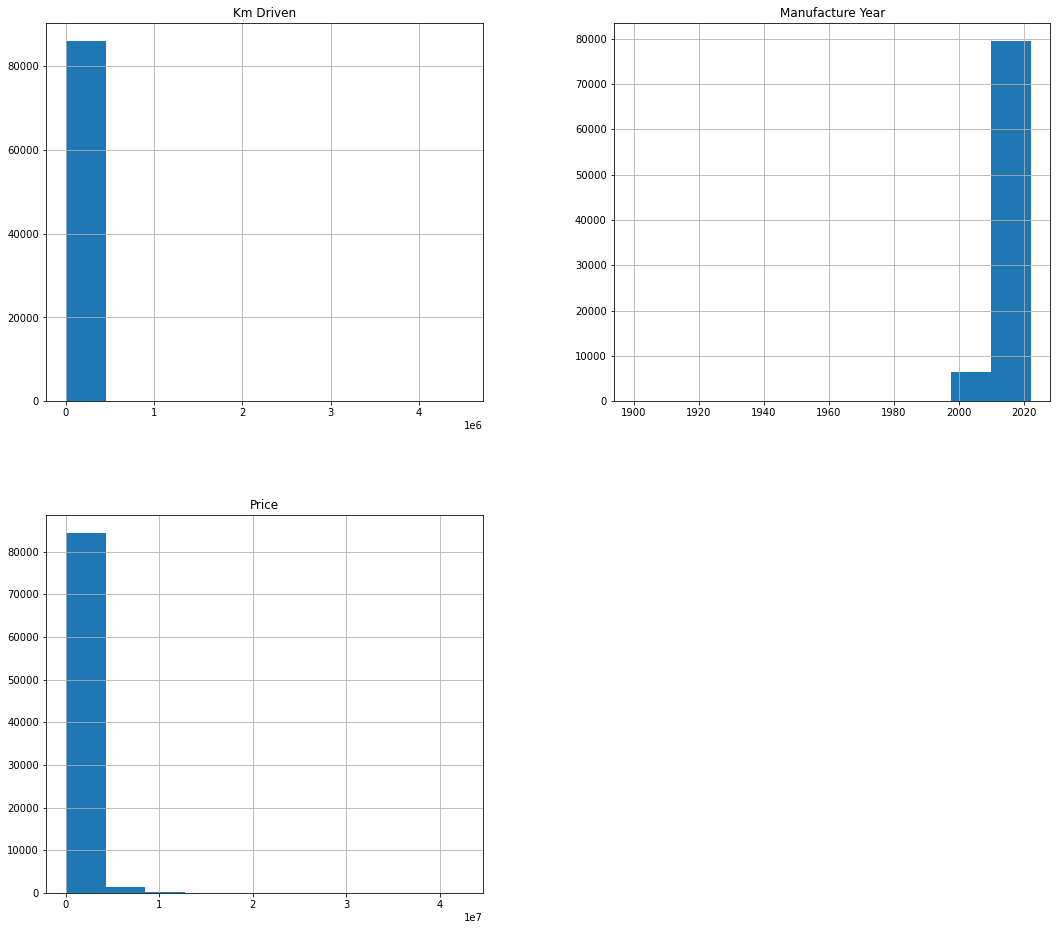

In [112]:
df.hist(figsize=(18,16))

In [113]:
catg_col=[]
cont_col=[]
for col in df.columns:
    if df[col].dtype=='object':
        catg_col.append(col)
    else:
        cont_col.append(col)
        

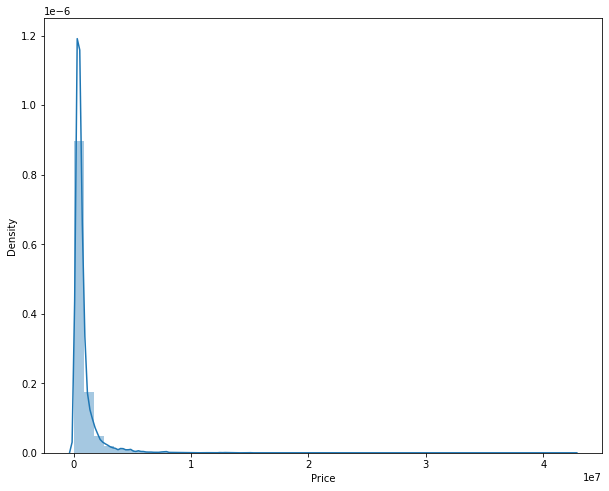

In [114]:
plt.figure(figsize=(10,8))
sns.distplot(df['Price'])
plt.show()

The target variable price is highly right skewed.

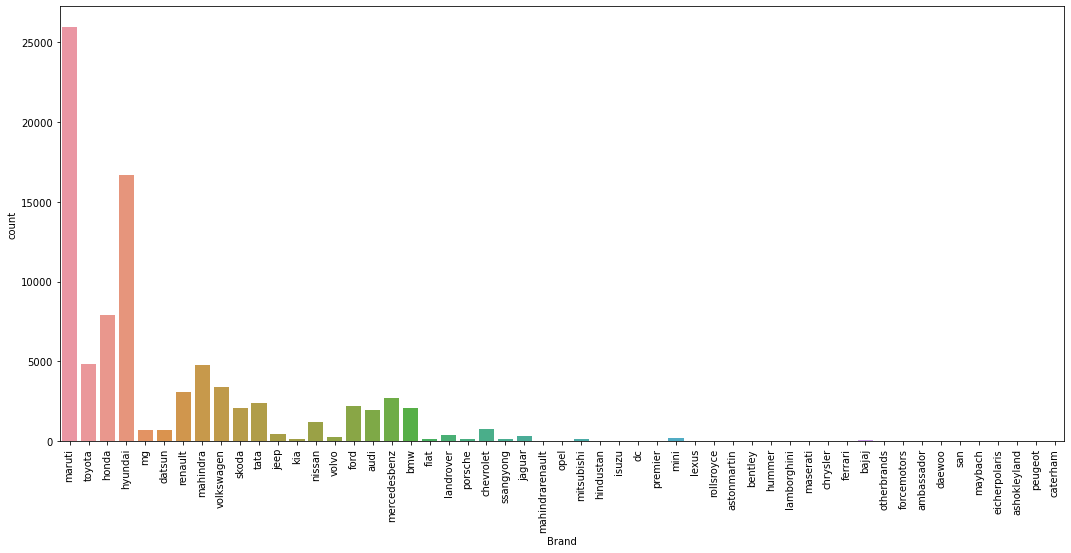

In [115]:
plt.figure(figsize=(18,8))
sns.countplot(df['Brand'])
plt.xticks(rotation=90)
plt.show()


Observatios:
We have more maruthi brand cars than other brands and followed by hyndai.

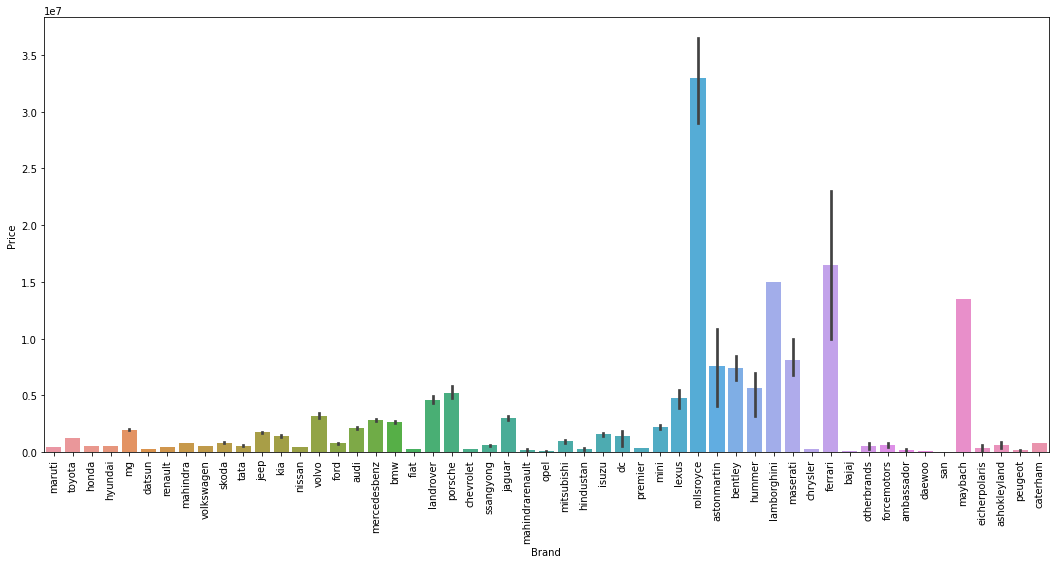

In [116]:
plt.figure(figsize=(18,8))
sns.barplot(df['Brand'],df['Price'])
plt.xticks(rotation=90)
plt.show()

Observations:
    1. Price of Rolls royce cars are higher than other brand cars

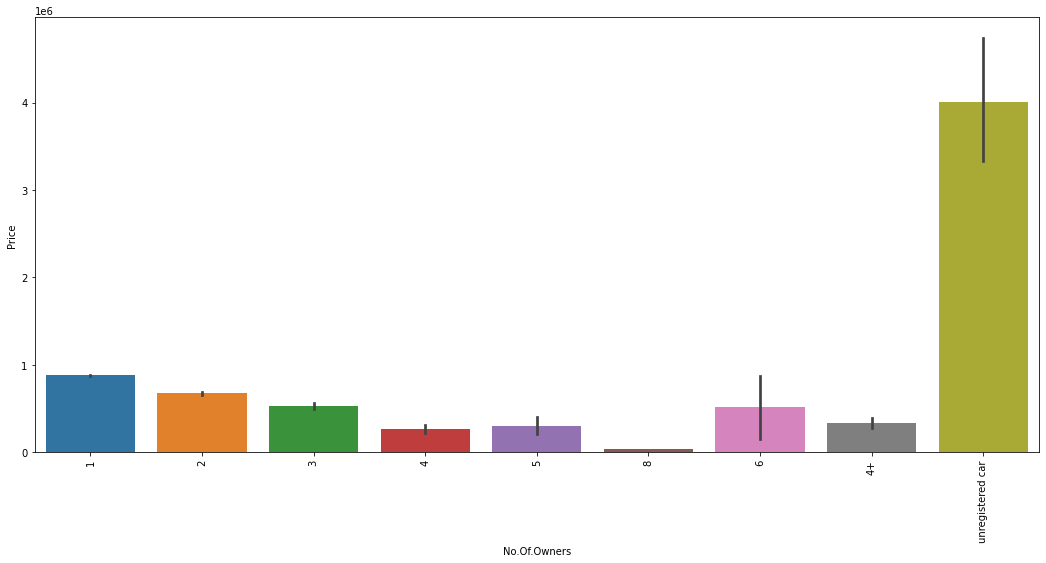

In [117]:
plt.figure(figsize=(18,8))
sns.barplot(df['No.Of.Owners'],df['Price'])
plt.xticks(rotation=90)
plt.show()

Observations:
    1. Price of Unregistered cars and 1st owner cars are higher than others.
    2. When the number of owners increase, the price of the car is less.

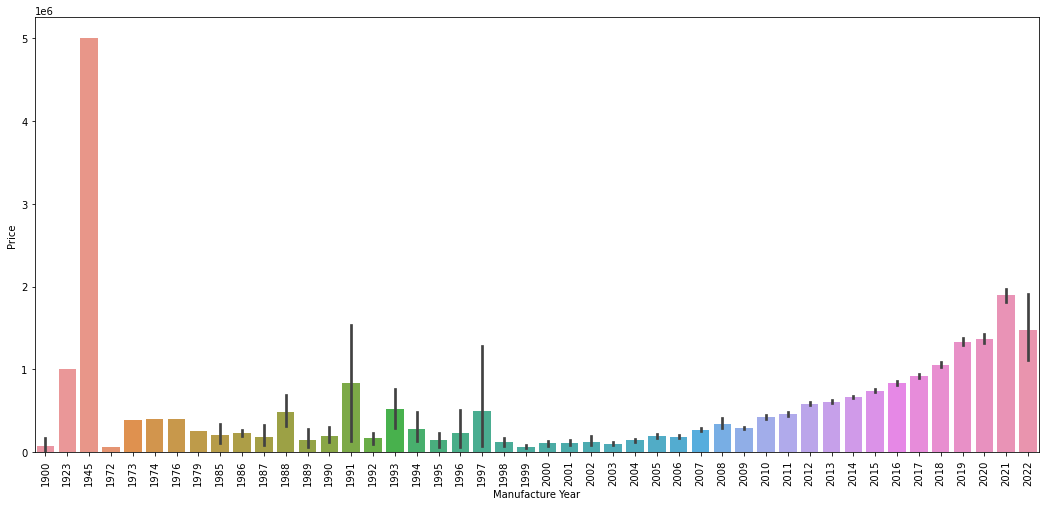

In [667]:
plt.figure(figsize=(18,8))
sns.barplot(df['Manufacture Year'],df['Price'])
plt.xticks(rotation=90)
plt.show()

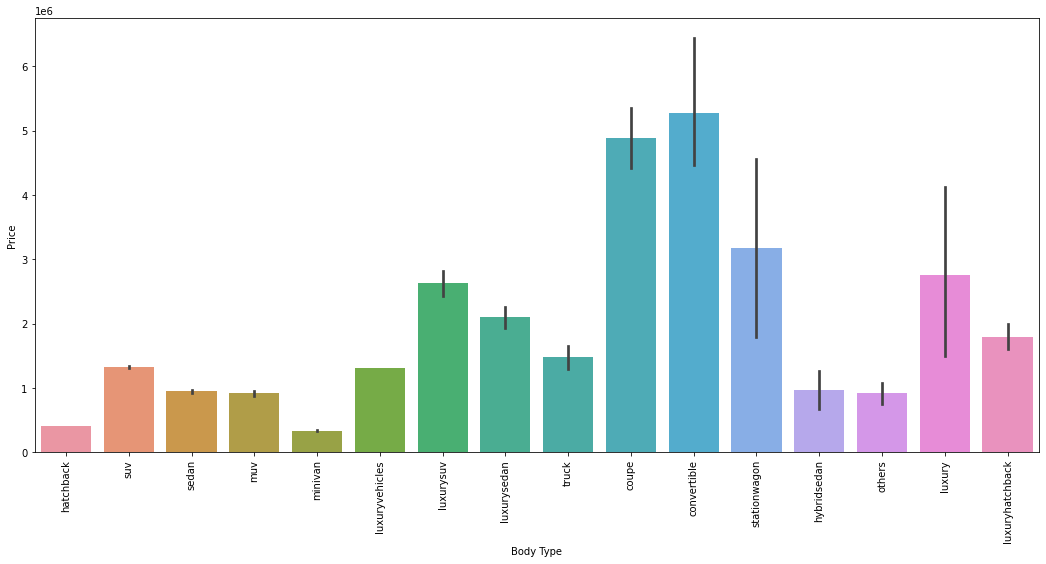

In [668]:
plt.figure(figsize=(18,8))
sns.barplot(df['Body Type'],df['Price'])
plt.xticks(rotation=90)
plt.show()

Observations:
    1. The price of convertible body type cars are higher than other body types and followed by coupe.

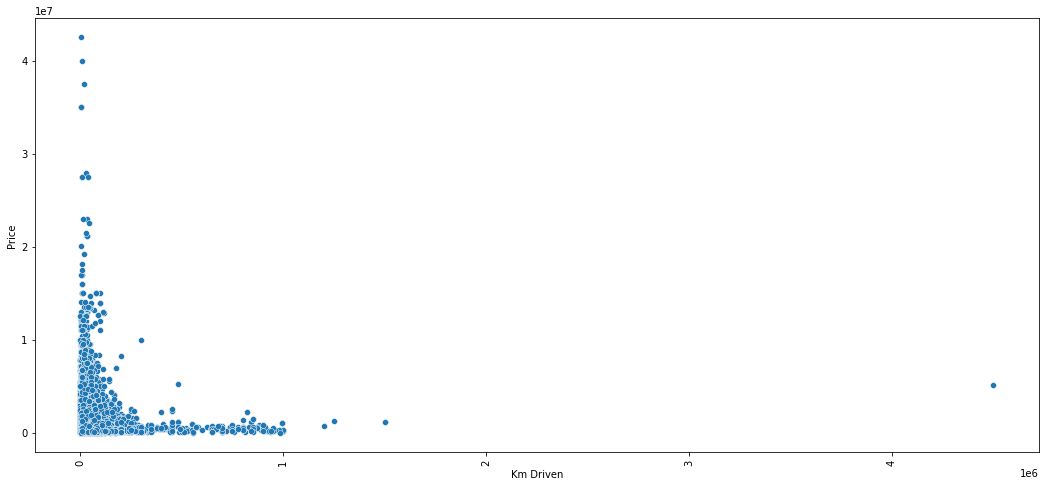

In [669]:
plt.figure(figsize=(18,8))
sns.scatterplot(df['Km Driven'],df['Price'])
plt.xticks(rotation=90)
plt.show()

Observations:
    1. When the Km driven is less, the car price is more.

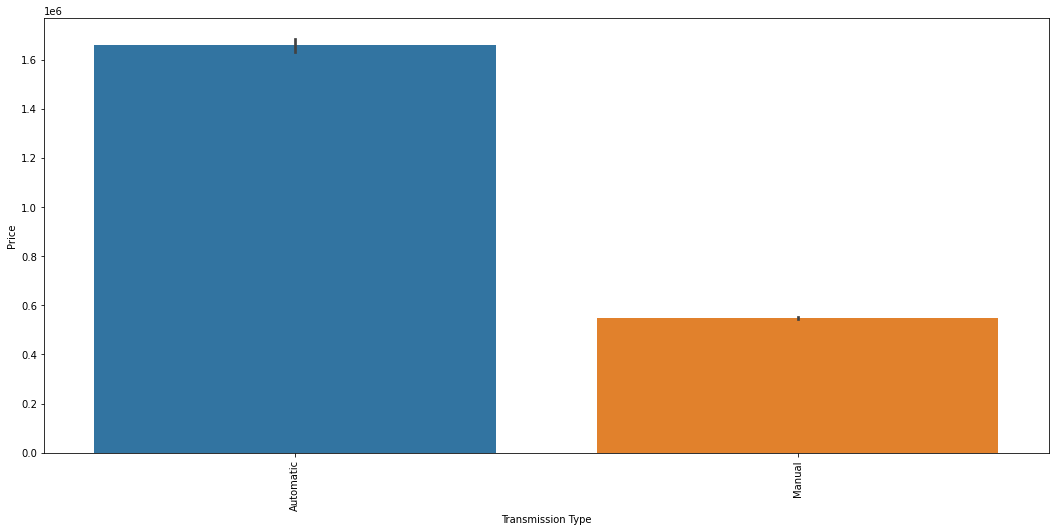

In [670]:
plt.figure(figsize=(18,8))
sns.barplot(df['Transmission Type'],df['Price'])
plt.xticks(rotation=90)
plt.show()

Observations: 1. The price of automatic transmission type cars are higher than manual cars.

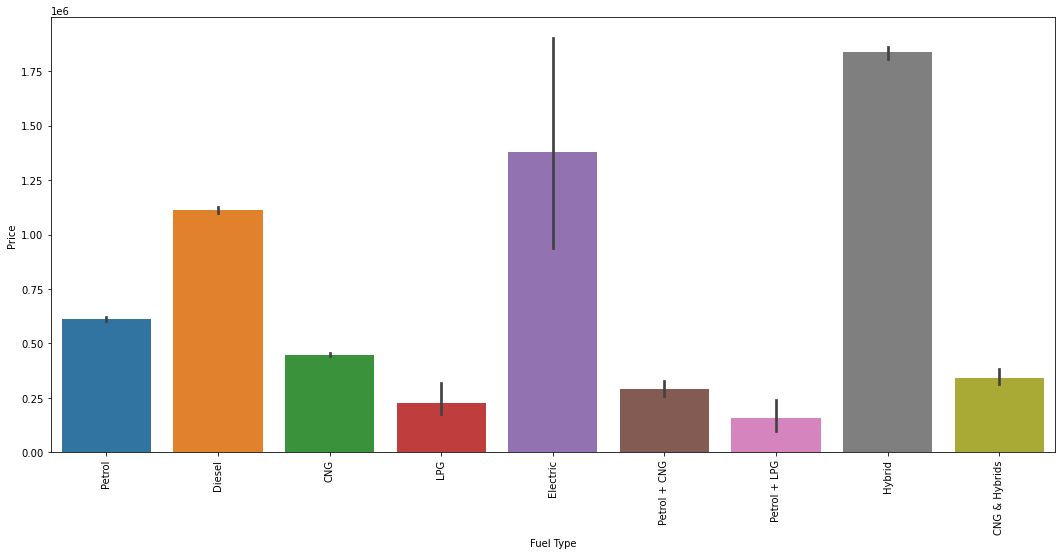

In [671]:
plt.figure(figsize=(18,8))
sns.barplot(df['Fuel Type'],df['Price'])
plt.xticks(rotation=90)
plt.show()

Observations:
   1. The price of Hybrid fuel type cars are higher than other fuel type cars and followed by Electric cars and diesel cars.

<Figure size 720x864 with 0 Axes>

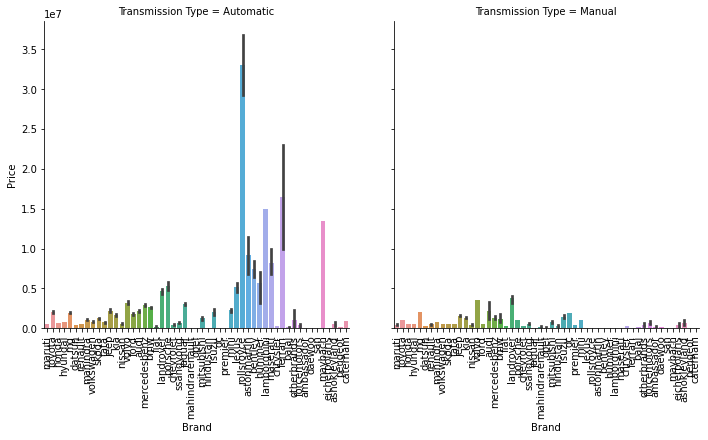

In [672]:
plt.figure(figsize=(10,12))
cat=sns.catplot(x='Brand',y='Price',data=df,kind='bar',col='Transmission Type',)
cat.set_xticklabels(rotation=90)
plt.show()

Observations:
1. RollsRoyce brand cars with automatic transmission type are costlier than other type of cars.

EDA Conclusion Points:
1. We have more maruthi brand cars than other brands and followed by hyndai.
2. Price of Rolls royce cars are higher than other brand cars
3. Price of Unregistered cars and 1st owner cars are higher than others.
4. When the number of owners increase, the price of the car is less.
5. The price of convertible body type cars are higher than other body types and followed by coupe.
6. When the Km driven is less, the car price is more.
7. The price of automatic transmission type cars are higher than manual cars.
8. The price of Hybrid fuel type cars are higher than other fuel type cars and followed by Electric cars and diesel cars.
9. RollsRoyce brand cars with automatic transmission type are costlier than other type of cars.

#### Encoding the non numeric features

In [673]:
catg_col

['Brand',
 'Model',
 'Variant',
 'Body Type',
 'Location',
 'Transmission Type',
 'Fuel Type',
 'No.Of.Owners']

In [674]:
from sklearn.preprocessing import LabelEncoder

In [675]:
lbl_enc=LabelEncoder()
for col in catg_col:
    df[col]=lbl_enc.fit_transform(df[col])
df.head()

,Brand,Model,Variant,Body Type,Location,Km Driven,Transmission Type,Fuel Type,Manufacture Year,No.Of.Owners,Price
0,31,64,136,2,1435,23825,0,6,2016,0,725000.0
1,31,400,4944,2,1435,1670,1,6,2019,0,470000.0
2,50,446,3426,14,162,5178,1,6,2021,0,1136000.0
3,19,90,3527,12,704,58761,0,6,2016,0,871000.0
4,21,203,156,2,704,42754,1,6,2016,0,504000.0


### Checking Multi-colliearity 

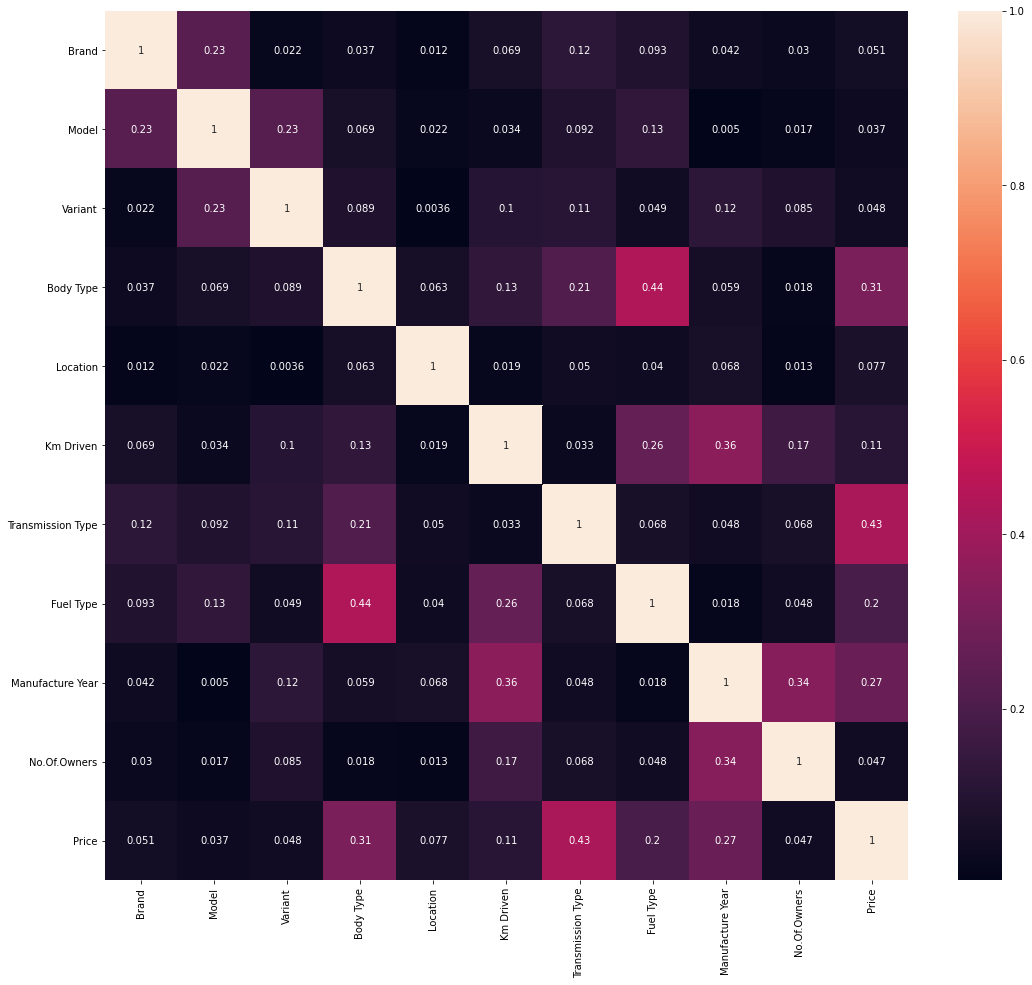

In [676]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

Observation:
   1. Could not find strong relationship with the features with target variable and within the other features.
   2. Transmission type is 43% correlated with target variable price
   3. Body type is 31% correlated with target variable price.
   4. Fuel type and body type are 44% correlated with each other.
   5. Manufacturing year and Km driven are 36% correlated with each other.

### Checking outliers

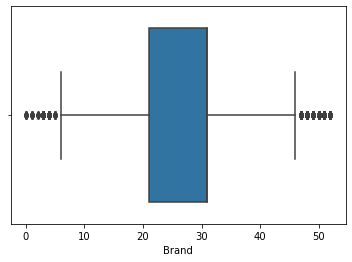

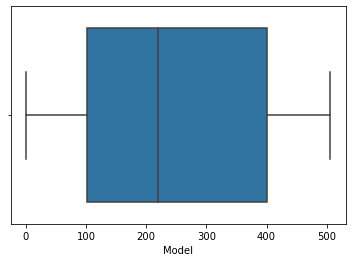

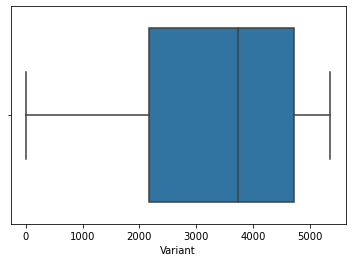

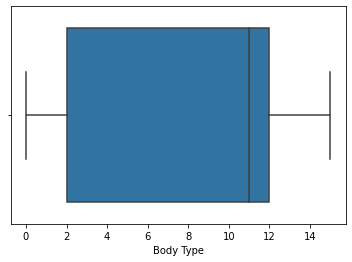

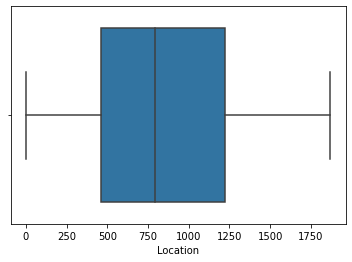

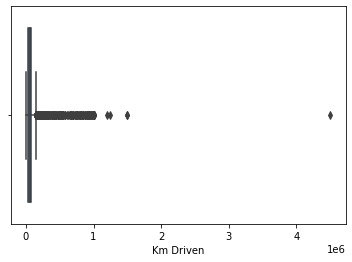

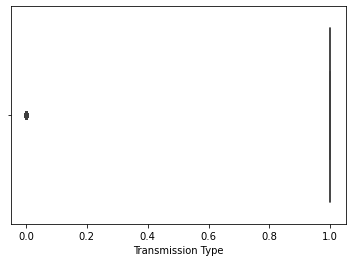

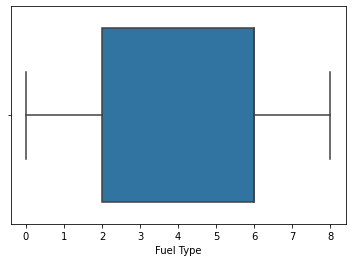

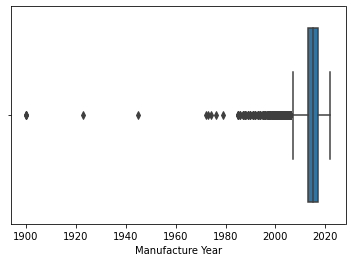

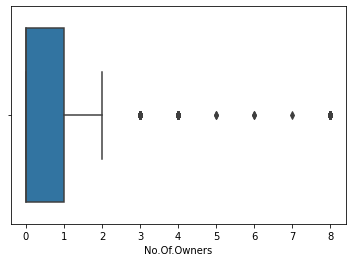

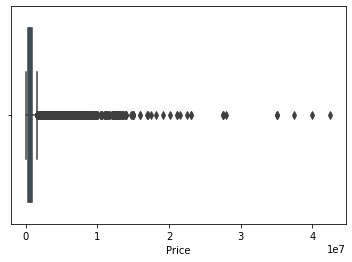

In [677]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

Observations:
1. We have outliers in Brand, Km Driven,Manufacturing year,No.Of.Owners and price.
2. Brand,Manufacturing year,No.of.Owners are categorical variables.Hence we will not remove outliers for these features.
3. Lets remove outliers for Km Driven.
4. Price is target variable, hence we will not remove outliers.
    

In [678]:
from scipy.stats import zscore

In [679]:
score=zscore(df[['Km Driven','Manufacture Year']])
filtering=(score<3).all(axis=1)
new_df=df[filtering]
print(df.shape,new_df.shape)

(86054, 11) (85643, 11)


<AxesSubplot:xlabel='Km Driven'>

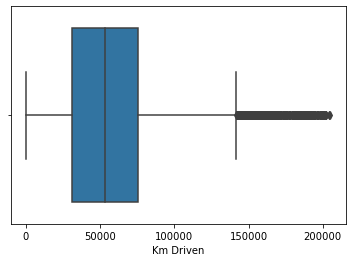

In [680]:
sns.boxplot(new_df['Km Driven'])

<AxesSubplot:xlabel='Manufacture Year'>

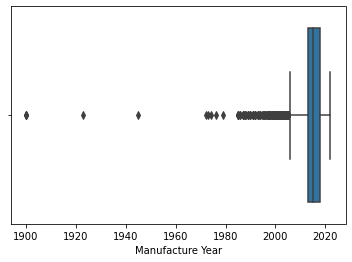

In [681]:
sns.boxplot(new_df['Manufacture Year'])

In [682]:
data_loss=((df.shape[0]-new_df.shape[0])/df.shape[0])*100
data_loss

0.4776070839240477

We lost 0.5% of data as part of outliers removal

In [683]:
new_df.skew().sort_values()

Manufacture Year    -2.213980
Transmission Type   -1.201579
Variant             -0.613107
Fuel Type           -0.286916
Body Type           -0.059269
Location             0.065869
Brand                0.182204
Model                0.244227
Km Driven            0.862776
No.Of.Owners         3.611049
Price                7.981200
dtype: float64

We have skewed data in the features Manufacture Year,Transmission Type,Variant,Km Driven and No.Of.Owners.Lets apply transformation to remove the skewness.

In [684]:
skewed_features=['Manufacture Year','Transmission Type','Variant','Km Driven','No.Of.Owners']
from sklearn.preprocessing import PowerTransformer
new_df[skewed_features]=PowerTransformer().fit_transform(new_df[skewed_features])
print(new_df.skew().sort_values())

Transmission Type   -1.201579
Manufacture Year    -0.668773
Variant             -0.549264
Fuel Type           -0.286916
Km Driven           -0.063760
Body Type           -0.059269
Location             0.065869
Brand                0.182204
Model                0.244227
No.Of.Owners         0.961820
Price                7.981200
dtype: float64


We reduced the skewness by applying PowerTransformer.

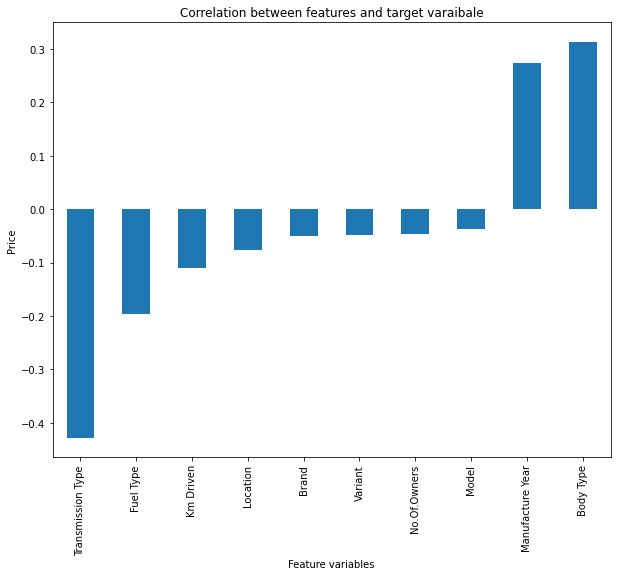

In [685]:
plt.figure(figsize=(10,8))
df.corr()['Price'].sort_values().drop(['Price']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Correlation between features and target varaibale')
plt.show()

Transmission type and body type are highly correlated to target variable than other features.

## Building Models

In [686]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score,train_test_split
import xgboost
from xgboost import XGBRegressor

In [687]:
X=new_df.drop(['Price'],axis=1)
y=new_df['Price']

In [688]:
X.shape

(85643, 10)

In [689]:
y.shape

(85643,)

In [690]:
from sklearn.preprocessing import StandardScaler
X_sc=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

##### Checking multi colinearity using VIF

In [691]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [692]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
5,1.692792,Km Driven
8,1.632484,Manufacture Year
7,1.438583,Fuel Type
3,1.308619,Body Type
9,1.172551,No.Of.Owners
1,1.142877,Model
2,1.104051,Variant
6,1.097001,Transmission Type
0,1.085151,Brand
4,1.010948,Location


We do not have multi-colliearity problem in our dataset.

#### Finding best random state

In [693]:
m_acc=0
rs=0
for i in range(1,100):
    X_train,X_val,y_train,y_val=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_val)
    acc=r2_score(y_val,y_pred)
    if(acc>m_acc):
        m_acc=acc
        rs=i
print('Accuracy: ',m_acc,'RS: ',rs)

Accuracy:  0.36203199379489803 RS:  91


In [694]:
X_train,X_val,y_train,y_val=train_test_split(X_sc,y,test_size=0.25,random_state=91)

In [695]:
lr=LinearRegression()
rf_reg=RandomForestRegressor()
dt_reg=DecisionTreeRegressor()
kn_reg=KNeighborsRegressor()
gb_reg=GradientBoostingRegressor()
ls=Lasso()
xgb=XGBRegressor()

In [696]:
model=[lr,rf_reg,dt_reg,kn_reg,xgb,ls,gb_reg]
for m in model:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_val)
    print('Metrics for ',m)
    print('Accuracy score: ',r2_score(y_val,y_pred))
    print('Mean Absolute Error: ',mean_absolute_error(y_val,y_pred))
    print('Mean Squared Error: ',np.sqrt(mean_squared_error(y_val,y_pred)),'\n')


Metrics for  LinearRegression()
Accuracy score:  0.36203199379489803
Mean Absolute Error:  427240.672063632
Mean Squared Error:  821965.5331783117 

Metrics for  RandomForestRegressor()
Accuracy score:  0.9188374652725624
Mean Absolute Error:  63710.88867030447
Mean Squared Error:  293178.391675638 

Metrics for  DecisionTreeRegressor()
Accuracy score:  0.8459711352546978
Mean Absolute Error:  71455.00641783755
Mean Squared Error:  403882.6660993724 

Metrics for  KNeighborsRegressor()
Accuracy score:  0.7360214797957454
Mean Absolute Error:  134855.51542664986
Mean Squared Error:  528735.4777246282 

Metrics for  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constrain

In [697]:
for m in model:
    print("Cross val score for ",m,cross_val_score(m,X_sc,y,cv=5).mean())

Cross val score for  LinearRegression() 0.10169832825605682
Cross val score for  RandomForestRegressor() 0.6612586600757814
Cross val score for  DecisionTreeRegressor() 0.3720882165772373
Cross val score for  KNeighborsRegressor() 0.32695937323487223
Cross val score for  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) 0.692748998757812
Cross val score for  Lasso() 0.10170046881300787
Cross val score for  GradientBoo

### Hyper Parameter tuning

In [698]:
from sklearn.model_selection import GridSearchCV

In [699]:
param={'n_estimators':[150,180,210]}
grd_srch=GridSearchCV(XGBRegressor(),param_grid=param,n_jobs=-1)
grd_srch.fit(X_train,y_train)
print(grd_srch.best_estimator_)
print(grd_srch.best_params_)
print(grd_srch.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=210, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
{'n_estimators': 210}
0.9051386735269134


In [700]:
r_mean=0
rs=0
for i in range(1,20):
    gb_reg=XGBRegressor(n_estimators=210,random_state=i)
    gb_reg.fit(X_train,y_train)
    y_pred=gb_reg.predict(X_val)
    r_mean_square=np.sqrt(mean_squared_error(y_val,y_pred))
    if(r_mean==0):
        r_mean=r_mean_square
        rs=i
    elif(r_mean_square < r_mean):
        r_mean=r_mean_square
        rs=i
print("Best error: ",r_mean,"RS: ",rs)
gb_reg=XGBRegressor(n_estimators=210,random_state=rs)
gb_reg.fit(X_train,y_train)
y_pred=gb_reg.predict(X_val)
print('Accuracy: ',r2_score(y_val,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_val,y_pred))
print('Mean Squared Error: ',mean_squared_error(y_val,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_val,y_pred)))

Best error:  266817.48610793194 RS:  1
Accuracy:  0.9327766329089393
Mean Absolute Error:  83272.62068522979
Mean Squared Error:  71191570892.95647
Root Mean Squared Error:  266817.48610793194


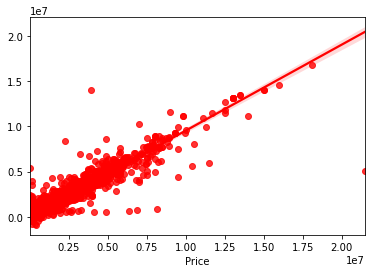

In [701]:
sns.regplot(y_val,y_pred,color='r')
plt.show()

### We able to build a final model with 93% of accuracy rate.

In [702]:
import pickle

In [703]:
pickle.dump(gb_reg,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/CarPricePrediction.pkl','wb'))

In [704]:
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/CarPricePrediction.pkl','rb'))

In [708]:
prediction=final_model.predict(X_val)
prediction=[round(x) for x in prediction]
result=pd.DataFrame({'Actual':y_val,'Predicted':prediction})
result

,Actual,Predicted
39691,450000.0,391881
4056,124000.0,193948
3665,681500.0,659644
42874,1500000.0,1502492
23798,325000.0,319337
...,...,...
4252,295000.0,460461
8673,2150000.0,2118736
9022,335000.0,308924
6630,275000.0,232742
